# Projektaufgabe 3

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/Library_Usage_Clean.csv')

# Welche Kundinnen haben 0 Ausleihen?

# Wieviele Senioren und Kinder sind Kund*innen? 

In [2]:
df['Patron Type Definition'].value_counts()
# man sieht nominale werte

Adult                  257099
Senior                  45422
Juvenile                43487
Teen                    33815
Welcome                  8680
Digital Access Card      3373
Teacher Card             2817
Staff                     407
Retired Staff             134
At User Adult             119
Visitor                   108
Library By Mail           108
Bibliocommons              97
At User Senior             75
At User Welcome            11
At User Teen               10
At User Juvenile            8
Business                    2
Name: Patron Type Definition, dtype: int64

In [3]:
df['Age Range'].value_counts()
# man sieht ordinale Werte

25 to 34 years       86997
35 to 44 years       76611
10 to 19 years       57746
45 to 54 years       46699
65 to 74 years       30439
0 to 9 years         22000
20 to 24 years       21967
55 to 59 years       18401
75 years and over    18113
60 to 64 years       16799
Name: Age Range, dtype: int64

In der Beschreibung des Datensatzes steht, dass sich die Spalte 'Age Range' nach dem Geburtsdatum richtet. D.h. es ist davon auszugehen, dass die Nutzer der Bibliothek zum Zeitpunkt der Bereitstellung des Datensatzes (2023) in die Kategorien von 'Age Range' einsortiert werden. In der Spalte 'Patron Type Definition' sind verschiedene Merkmalsausprägungen zu finden, die nicht unbedingt etwas mit dem Alter zu tun haben (z.B. VISITOR oder SPECIAL). Daher ist davon auszugehen, dass wir mit 'Age Range' am nähesten Fragestellungen zu Alter beantworten zu können. Richtige Angaben zu tatsächlichem Alter der Nutzer liegen bei diesem Datensatz nicht vor.


An dieser Stelle ist also zu definieren, was Senioren und Kinder sind. Eine Möglichkeit ist, Senioren als Age Range = 65 to 74 years und Age Range = 75 years and over zu definieren, man könnte aber auch Age Range = 60 to 64 years dazunehmen. Für das weitere Vorgehen, definieren wir Senioren als über 65-jährige und Kinder als bis 19-jährige. Um die Frage 1 zu beantworten, reicht es also, die entsprechenden Einträge zu summieren.



In [4]:
kinder=df.loc[df['Age Range'] == "0 to 9 years"] 
kinder=df.loc[
    (df['Age Range'] == "0 to 9 years") | 
    (df['Age Range'] == "10 to 19 years")] 
#Hilfsvariable

In [5]:
len(kinder)

79746

In [6]:
senioren=df.loc[
    (df['Age Range'] == "65 to 74 years") | 
    (df['Age Range'] == "75 years and over")] 
#Hilfsvariable

In [7]:
len(senioren)

48552

# Antwort auf Frage 1:



In [8]:
print('Es sind ' + str(len(kinder)) + ' Kinder (bis 19 Jahre) und ' + str(len(senioren)) + ' Senioren (ab 65 Jahren) registriert.' )


Es sind 79746 Kinder (bis 19 Jahre) und 48552 Senioren (ab 65 Jahren) registriert.


# Prozentangaben Aufgabe 1

In [9]:
row_filter_sen = (df['Age Range'] == '65 to 74 years') | (df['Age Range'] == '74 years and over')
senioren = len(df.loc[row_filter_sen])*100/len(df)

row_filter_kids = (df['Age Range'] == '0 to 9 years') | (df['Age Range'] == '10 to 19 years')
kids = len(df.loc[row_filter_kids])*100/len(df)

# die 2 macht zweistellen hinter dem KOmma

print(round(senioren,2),"Prozent der Kund*innen sind Senioren ab 64 Jahren und",round(kids,2),"Prozent sind Kinder und Jugendliche bis 19 Jahre.")

7.69 Prozent der Kund*innen sind Senioren ab 64 Jahren und 20.15 Prozent sind Kinder und Jugendliche bis 19 Jahre.


<Figure size 640x480 with 0 Axes>

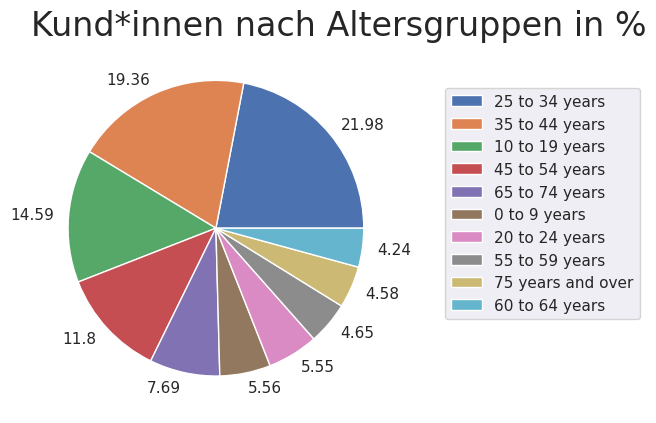

<Figure size 640x480 with 0 Axes>

In [10]:
alle = len(df)
df_alter = df['Age Range']
s = df_alter.value_counts()*100/alle

plt.pie(s,labels=(round(s,2)))
plt.legend(s.index,bbox_to_anchor=(1.1,0.9),loc='upper left')
plt.title('Kund*innen nach Altersgruppen in %',fontsize=24,loc='left')
plt.figure()

Text(1.0, 1.0, 'Anzahl der Ausleihen nach Altersgruppen')

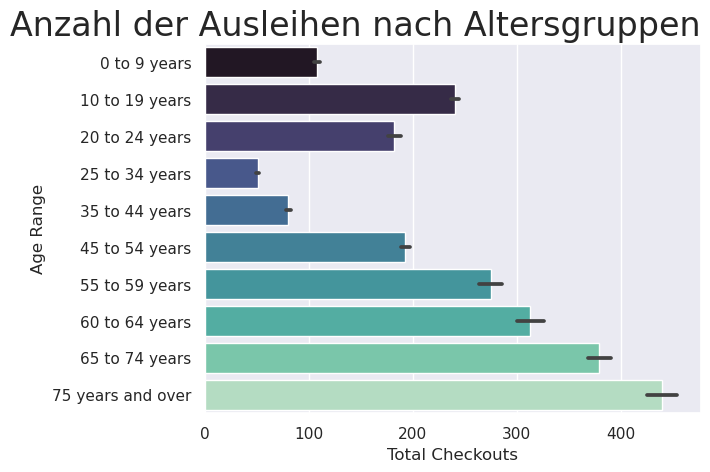

In [11]:
order = ['0 to 9 years','10 to 19 years','20 to 24 years','25 to 34 years', '35 to 44 years','45 to 54 years','55 to 59 years','60 to 64 years','65 to 74 years','75 years and over']
# balkendiagramm für DataFrame, auf y soll Age Range liegen, auf x die Ausleihen, die Reihenfolge wie unter order=
#    und die farbpalette mako (gibt noch flare und viridis)
sns.barplot(data=df,y='Age Range',x='Total Checkouts',order=order,palette='mako')

# plt.cticks(rotation=90) > wenn man y und x tauscht und die rotation ändert, dann ist die anzeige gedreht
# plt.title gibt den Titel der Grafik an 
plt.title('Anzahl der Ausleihen nach Altersgruppen',fontsize=24,loc='right')
# Diagramm mit plt.figure() ausführen

# experiement Grafik seaborn > keine Ahnung was der effort sein soll = eine Bewerbung bei Fox News! :)

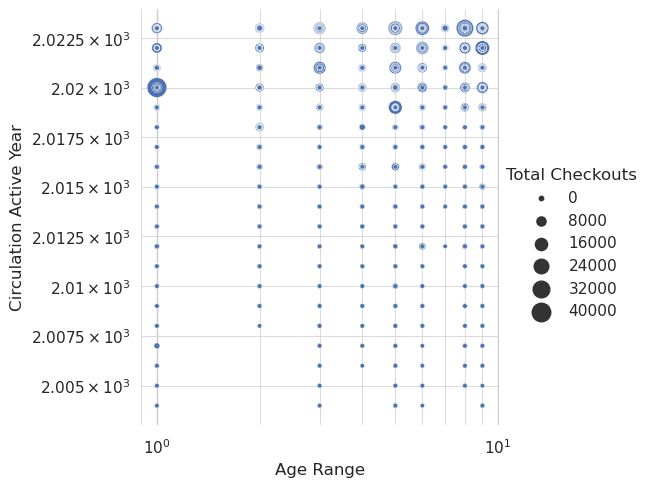

In [12]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    y="Circulation Active Year", x="Age Range",
    size="Total Checkouts",
    palette=cmap, sizes=(10, 200))
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.50)
g.ax.yaxis.grid(True, "minor", linewidth=.50)
g.despine(left=True, bottom=True)

# Frage 2: Wieviele Nutzer*innen möchten per E-Mail informiert werden?

In [13]:
len(df.loc[(df['Notice Preference Definition'] == "Email")])

356232

In [14]:
print(str(len(df.loc[(df['Notice Preference Definition'] == "Email")])) + ' Nutzer*innen möchten per Mail informiert werden.')

356232 Nutzer*innen möchten per Mail informiert werden.


In [15]:
row_filter_email = (df['Notice Preference Definition'] == 'Email')
row_filter_brief = (df['Notice Preference Definition'] == 'Print')
email = len(df.loc[row_filter_email])*100/len(df)
brief = len(df.loc[row_filter_brief])*100/len(df)
print(round(email,2),"Anzahl der Emailempfänger*innen in %",round(brief,2),"Anzahl der Briefempfänger*innen in %")

90.01 Anzahl der Emailempfänger*innen in % 1.51 Anzahl der Briefempfänger*innen in %


# Frage 3: Wie alt sind diese Nutzer*innen durchschnittlich im Vergleich zu Nutzer*innen, die per Post informiert werden möchten?


In [16]:
df = pd.read_csv('../data/Library_Usage_Clean.csv')
df['Notice Preference Definition'].value_counts()

Email    356232
Phone     31680
Print      5967
None       1893
Name: Notice Preference Definition, dtype: int64

In [17]:
age_df=pd.crosstab(df['Age Range'],df['Notice Preference Definition'],margins=False)
age_df

Notice Preference Definition,Email,None,Phone,Print
Age Range,,,,
0 to 9 years,19313,287,1884,516
10 to 19 years,47360,207,9611,568
20 to 24 years,19446,119,2093,309
25 to 34 years,82720,440,2710,1127
35 to 44 years,72764,380,2475,992
45 to 54 years,43561,194,2312,632
55 to 59 years,16654,70,1373,304
60 to 64 years,14726,73,1682,318
65 to 74 years,25853,74,3850,662


In [18]:
age_df = age_df.rename_axis('Age Range').reset_index()
age_df = age_df.sort_values(by=['Age Range'])

age_df['Age Mean'] = [(0+9)/2,(10+19)/2,(20+24)/2,(25+34)/2,(35+44)/2,(45+54)/2,(55+59)/2,(60+64)/2,(65+74)/2,77.0]
age_df['Age Email'] = age_df['Email']*age_df['Age Mean']
age_df['Age Print'] = age_df['Print']*age_df['Age Mean']
age_df

Notice Preference Definition,Age Range,Email,None,Phone,Print,Age Mean,Age Email,Age Print
0,0 to 9 years,19313,287,1884,516,4.5,86908.5,2322.0
1,10 to 19 years,47360,207,9611,568,14.5,686720.0,8236.0
2,20 to 24 years,19446,119,2093,309,22.0,427812.0,6798.0
3,25 to 34 years,82720,440,2710,1127,29.5,2440240.0,33246.5
4,35 to 44 years,72764,380,2475,992,39.5,2874178.0,39184.0
5,45 to 54 years,43561,194,2312,632,49.5,2156269.5,31284.0
6,55 to 59 years,16654,70,1373,304,57.0,949278.0,17328.0
7,60 to 64 years,14726,73,1682,318,62.0,913012.0,19716.0
8,65 to 74 years,25853,74,3850,662,69.5,1796783.5,46009.0
9,75 years and over,13835,49,3690,539,77.0,1065295.0,41503.0


In [19]:
alter_email = age_df['Age Email'].sum()/age_df['Email'].sum()
alter_post = age_df['Age Print'].sum()/age_df['Print'].sum()

print ("Menschen, die per Email benachrichtigt werden wollen, sind durchschnittlich",round(alter_email,2),'Jahre alt. Personen mit Postbenachrichtigung sind durchschnittlich',round(alter_post,2),'Jahre alt.')

Menschen, die per Email benachrichtigt werden wollen, sind durchschnittlich 37.61 Jahre alt. Personen mit Postbenachrichtigung sind durchschnittlich 41.16 Jahre alt.


# Wieviel leiht jede der Altersgruppe aus?

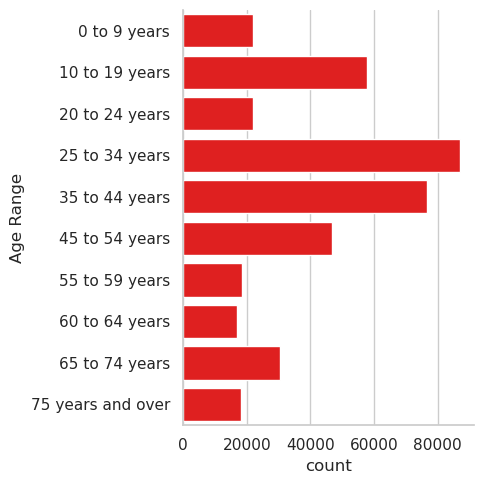

In [20]:
order = ['0 to 9 years','10 to 19 years','20 to 24 years','25 to 34 years', '35 to 44 years','45 to 54 years','55 to 59 years','60 to 64 years','65 to 74 years','75 years and over']
sns.catplot(y='Age Range',data=df,kind='count',color='red', order=order)
# plt.title('Anzahl NutzerInnen nach Altersgruppen',fontsize=24,loc='left')
# plt.figure()

# Wieviel leihen die Kund*innen aus die nicht aus San Francisco sind?

# Leihen sich nur Senioren viel aus?

# Wie hoch ist die Varianz der Ausleihen der Altersgruppe (?) ?

# Frage 4: Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

In [21]:
df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')
df['Membership Duration Years'] = (df['Circulation Active Year'] - df['Year Patron Registered'])+1 
# hier werden der einhheit ganze Jahre angenommen
df["Average Checkouts per Year"] =(df['Total Checkouts']/df['Membership Duration Years'])

In [22]:
df.head()

,Unnamed: 0,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Membership Duration Years,Average Checkouts per Year
0,40592,0,Adult,0,0,25 to 34 years,m8,Mission Bay,January,2023.0,z,Email,True,2017,True,7.0,0.000000
1,40593,0,Adult,6,0,35 to 44 years,x,Main,January,2023.0,z,Email,True,2017,False,7.0,0.857143
2,40594,1,Juvenile,2236,2295,10 to 19 years,o7,Ortega,January,2023.0,z,Email,True,2011,True,13.0,172.000000
3,40595,0,Adult,49,13,60 to 64 years,r3,Richmond,January,2023.0,z,Email,True,2011,True,13.0,3.769231
4,40596,2,Teen,1407,1091,10 to 19 years,o2,Ocean View,January,2023.0,z,Email,True,2012,True,12.0,117.250000


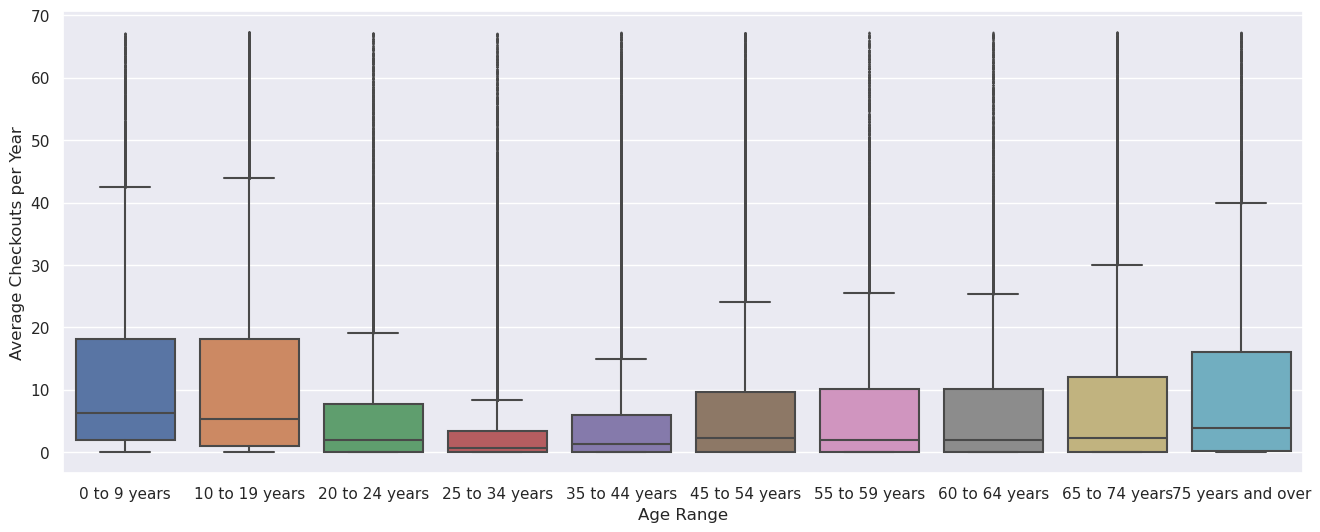

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()
plt.figure(figsize=(16, 6))
my_order =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']

plt = sns.boxplot(y='Average Checkouts per Year', x='Age Range', data=df[df['Average Checkouts per Year']<df['Average Checkouts per Year'].quantile(0.95)], fliersize=0.5, whis=1.5, order =my_order)

# Welche Kund*innen haben 0 Ausleihen?

In [24]:
df_nullis=df.loc[(df['Total Checkouts']==0.0)]
df_nullis

,Unnamed: 0,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Membership Duration Years,Average Checkouts per Year
0,40592,0,Adult,0,0,25 to 34 years,m8,Mission Bay,January,2023.0,z,Email,True,2017,True,7.0,0.0
10,40602,0,Adult,0,0,35 to 44 years,x,Main,January,2023.0,z,Email,True,2022,False,2.0,0.0
21,40614,0,Adult,0,0,35 to 44 years,a5,Anza,January,2023.0,z,Email,True,2014,True,10.0,0.0
25,40618,0,Adult,0,0,20 to 24 years,n4,Noe Valley,January,2023.0,z,Email,True,2022,True,2.0,0.0
33,40626,0,Adult,0,0,35 to 44 years,m2,Marina,January,2023.0,z,Email,True,2022,True,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395178,436519,0,Adult,0,0,45 to 54 years,b2,Bayview,October,2012.0,z,Email,True,2012,False,1.0,0.0
395425,436768,2,Teen,0,0,10 to 19 years,m6,Mission,August,2011.0,z,Email,True,2011,True,1.0,0.0
395449,436792,3,Senior,0,0,65 to 74 years,x,Main,May,2011.0,a,Print,False,2009,True,3.0,0.0
395647,436990,0,Adult,0,0,35 to 44 years,p7,Potrero,September,2008.0,z,Email,True,2008,True,1.0,0.0


# Welche Kund*innen haben null Ausleihen > als Tortendiagramm > ich finde den Fehler Nicht

In [25]:
row_filter_null = (df['Total Checkouts'] == 0.0)
df_nullis = df.loc[row_filter_null]

alle = len(df_nullis)
df_alter = df_nullis['Age Range']
s = df_alter.value_counts()*100/alle
plt.pie(s,labels=(round(s,2)))
plt.legend(s.index,bbox_to_anchor=(1.1,0.9),loc='upper left')
plt.title('BenutzerInnen ohne Ausleihen',fontsize=22,loc='left')
plt.figure()

TypeError: 'Text' object is not callable

# Leihen Leute über 65 mehr Bücher aus als Leute unter 20 im Schnitt?

In [30]:
row_filter = (df['Age Range'] == '65 to 74 years') | (df['Age Range'] == '75 years and over') | (df['Age Range'] == '0 to 9 years') | (df['Age Range'] == '10 to 19 years')
ausleihe_df = df.loc[row_filter]
ausleihe_df['Age Range'].value_counts()



10 to 19 years       57746
65 to 74 years       30439
0 to 9 years         22000
75 years and over    18113
Name: Age Range, dtype: int64

In [33]:
# Anzahl der Ausleihen pro Altergruppe
row_filter_sen = (df['Age Range'] == '65 to 74 years') | (df['Age Range'] =='75 years and over')
sen_df = df.loc[row_filter_sen]
checkouts_sen = sen_df['Total Checkouts'].sum()

# Anzahl der Menschen in einer Altersgruppe
senioren = len(df.loc[row_filter_sen])

# checkout_sen teilen durch senioren
durchschnitt_sen = checkouts_sen/senioren

print(round(durchschnitt_sen,2))

402.0


In [34]:
row_filter_kids = (df['Age Range'] == '0 to 9 years')| (df['Age Range'] =='10 to 19 years')
kids_df = df.loc[row_filter_kids]
checkouts_kids = kids_df['Total Checkouts'].sum()

kids = len(df.loc[row_filter_kids])

durchschnitt_kids = checkouts_kids/kids
print(round(durchschnitt_kids,2))

204.19


In [36]:
print('Ältere Menschen leihen fasst doppelt soviel aus als jüngere Menschen',('402 zu 204 Ausleihen.'))

Ältere Menschen leihen fasst doppelt soviel aus als jüngere Menschen 402 zu 204 Ausleihen.
